In [2]:
import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse as sps
import scipy.linalg as spla


In [3]:
def cheb(N):
    """
        Constructs the Chebyshev derivative of n Chebyshev points
        and outputs the derivative derivative operator and the Chebyshev points

        Based on L.N. Trefethan's Spectral Methods code
    """
    if N == 0:
        D = 0
        x = 1
        
    x = np.cos(np.pi * np.arange(N+1)/N)
    c = np.append(2,np.append(np.ones(N-1),2))
    c *= (-1)** np.arange(N+1)
    X = np.tile(x, (N+1,1)).T 
    dX = X - X.T
    D = np.outer(c,(1./c)) / (dX + np.eye(N+1))   # off-diagonal entries
    D -= np.diag(np.sum(D, 1))                      # diagonal entries
                     
    return D, x

In [8]:
N = 100

# Construct 2nd order derivative
na = np.arange(1,N)
h= 2*np.pi/N
column = np.append(0,np.array([0.5*(-1)**(na) / np.tan(na*h/2)]))

# construct 4th order derivative
e = np.ones(N)
row =  np.arange(N)
col1 = np.append(row[1:],row[:1])
col2 = np.append(row[2:],row[:2])
D2 = sps.csr_array((e/2, (row,col1)), shape = (N,N))
D2 = (D2-D2.T)/h

Dc2 = np.zeros((N,N))
Dc2[0,1::2] = np.arange(1,N,2)
for i in range(1,N-1):
    Dc2[i, i+1::2] = np.arange(2*(i+1),2*N-1,4)

ex = np.ones(N)
Dc,x = cheb(N)
D =  np.diag(ex[:-1], k=1) +  np.diag(ex[:-1], k=-1)
D3 =  np.diag(ex) + np.diag(-ex[:-1], k = -1) 
Df = spla.circulant(column)
U, S1, Vh = np.linalg.svd(Dc, full_matrices=True)
U, S2, Vh = np.linalg.svd(D, full_matrices=True)
U, S3, Vh = np.linalg.svd(Df, full_matrices=True)
U, S4, Vh = np.linalg.svd(D2.toarray(), full_matrices=True)
U, S5, Vh = np.linalg.svd(D3, full_matrices=True)
U, S6, Vh = np.linalg.svd(D3, full_matrices=True)

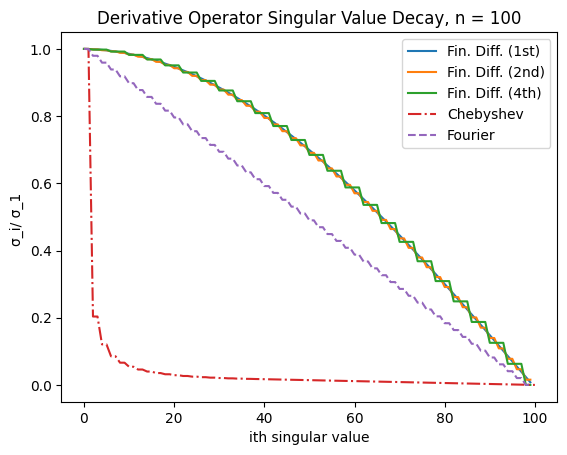

In [15]:
plt.plot(S5/S5[0], label = 'Fin. Diff. (1st)')
plt.plot(S2/S2[0], label = 'Fin. Diff. (2nd)')
plt.plot(S4/S4[0], label = 'Fin. Diff. (4th)')
plt.plot(S1/S1[0], '-.', label = 'Chebyshev')
#plt.plot(S6/S6[0], '-.', label = 'Chebyshev II')
plt.plot(S3/S3[0], '--', label = 'Fourier')
plt.xlabel('ith singular value')
plt.ylabel('σ_i/ σ_1 ')
plt.title('Derivative Operator Singular Value Decay, n = 100')
plt.legend()
plt.show()

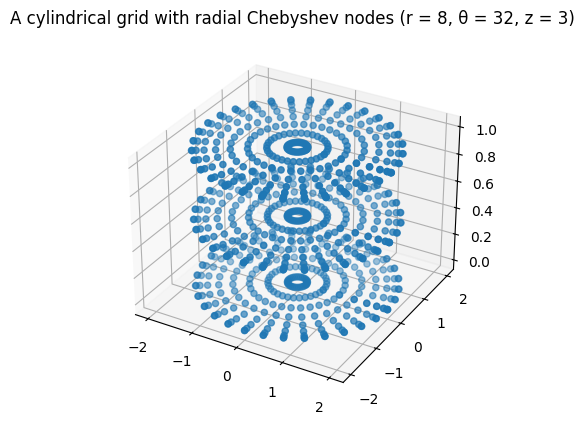

In [10]:
nr = 8
nw = 33
nz = 3
rmax = 2
r = rmax*np.polynomial.chebyshev.chebpts1(2*nr)
r = np.append(r[nr:], rmax)
theta = np.linspace(0,2*np.pi, nw)

z = np.linspace(0, 1,nz)

r, theta, z = np.meshgrid(r, theta,z)
x = r * np.cos(theta)
y = r * np.sin(theta)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.contourf(theta,r,f(r,theta))
ax.scatter(x, y, z)

ax.set_title("A cylindrical grid with radial Chebyshev nodes (r = 8, θ = 32, z = 3)", va='bottom')
plt.show()

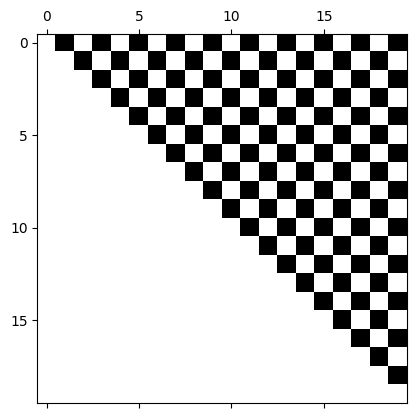

In [13]:
mat = np.zeros((20,20))
mat[0,1::2] = np.arange(1, 20,2)
for i in range(1,20-1):
    mat[i, i+1::2] = np.arange(2*(i+1),2*20-1,4)

plt.spy(mat)
plt.show()

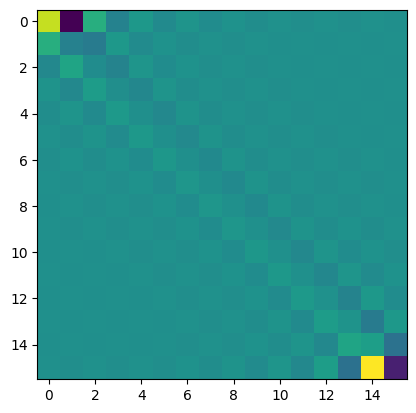

In [6]:
n = 15
D,x = cheb(n)
plt.imshow(D)

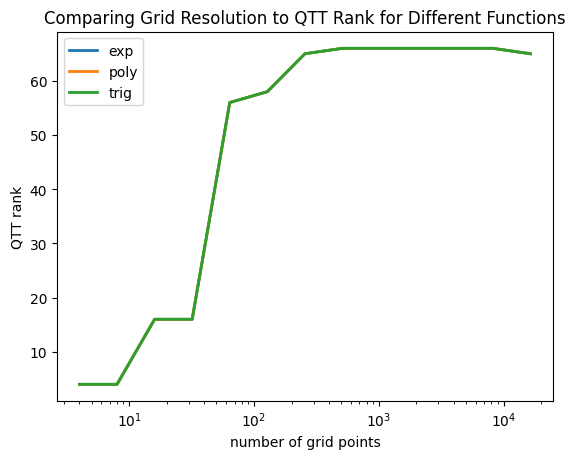

In [22]:
rank = np.array([4,4,16,16,56,58,65,66,66,66,66,66,65])
cores = np.logspace(2,14,13, endpoint=True, base=2.0)

plt.semilogx(cores,rank, linewidth = 2,label = 'exp')
plt.semilogx(cores,rank, linewidth = 2, label = 'poly')
plt.semilogx(cores,rank, linewidth = 2,label = 'trig')
plt.xlabel('number of grid points')
plt.ylabel('QTT rank')
plt.title('Comparing Grid Resolution to QTT Rank for Different Functions')
plt.legend()
plt.show()

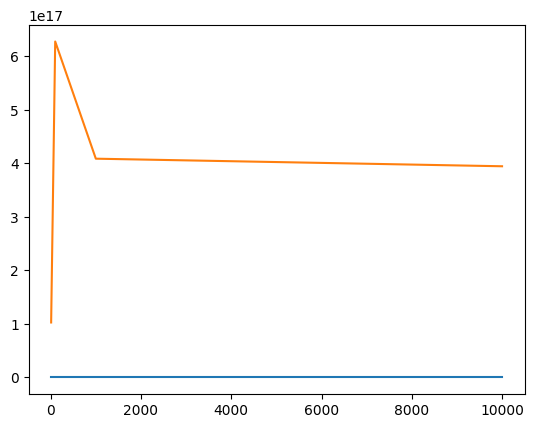

In [4]:
n = 4
npts = np.logspace(1, n, n,endpoint=True)
rnk = np.zeros(npts.shape)
cnd = np.zeros(npts.shape)

for i in range(n):
    D, x = cheb(int(npts[i]))
    rnk[i] = npla.matrix_rank(D, tol=None, hermitian=False)
    cnd[i] = npla.cond(D)



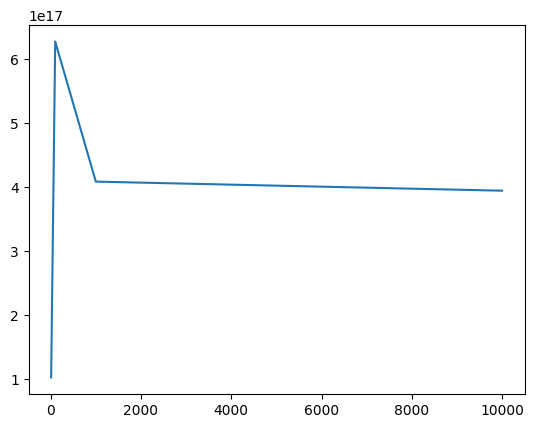

In [6]:
plt.plot(npts, cnd)
plt.show()